# **Segmentasi Pelanggan Mall (Clustering)**

Berikut ini merupakan implementasi teknik clutering untuk melakukan segmentasi terhadap pelanggan dari sebuah Mall. Pada contoh implementasi ini akan digunakan algoritma umum yang biasanya digunakan untuk melakukan proses clustering yaitu $K-Means$.

In [236]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline

## 1 - Load Dataset

Pada implementasi kali ini, digunakan datasets [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) dengan tujuan untuk melakukan clustering sehingga menemukan ***hiden patern*** yang memungkinkan memuat sebuah insight baru terhadap pelanggan Mall dari datatset. Jumlah row sebanyak $200$ dengan $5$ atribut.

---

### a. Load Dataset

In [237]:
def load_dataset():
  !wget 'https://raw.githubusercontent.com/shabri-arrahim/TELKOM_DTI_Multi-Linear-Regression/master/datasets/Mall_Customers.csv'
  dataset = pd.read_csv('Mall_Customers.csv', sep=',')

  return dataset

In [238]:
df = load_dataset()
df.head()

--2020-11-06 14:56:40--  https://raw.githubusercontent.com/shabri-arrahim/TELKOM_DTI_Multi-Linear-Regression/master/datasets/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2020-11-06 14:56:40 (50.6 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2 - Explorasi Data

Pada section ini, akan dilakukan eksplorasi pada dataset untuk mengidentifikasi hal-hal yang dianggap "Anomali" pada dataset seperti $Mising Value$, $Inkonsistensi  Nilai$, $DuplicatValue$ dan untuk melakukan screening terhadap dataset sebelum dimasukkan kedalam $Model Cluster$ yang akan dibangun.

---

### a. Melihat ukuran (**shape**) dari dataset

Pertama, lihat ukuran dataset

In [8]:
print("Ukuran dataset\t: {} \n\nDetail Atribut\t:\n{}".format(df.shape, df.dtypes))

Ukuran dataset	: (200, 5) 

Detail Atribut	:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Dataset memiliki jumlah record sebanyak $200$ (artinya memuat 200 data pelanggan) dan terdapat $5$ atribut.
Atribut - atribut tersebut diantaranya:


*   $CustomerID$ : Atribut yang menyatakan ID member dari setiap pelanggan.
*   $Gender$ : Atribut yang menyatakan jenis kelamin dari setiap pelanggan.
*   $Age$ : Atribut yang menyatakan sebaran umur dari setiap pelanggan.
*   $Annual Income (k\$)$ : Atribut yang menyatakan besaran pemasukan (income) dari setiap pelanggan.
*   $Spending Score (1-100)$ : Atribut yang menyatakan skor besaran pengeluaran dari setiap pelanggan.



---

### b. Identifikasi Nilai Duplikat

Kedua, megidentifikasi nilai yang duplikat didalam dataset 

In [9]:
print("Total Data Duplikat Pada Dataset: {}".format(df.duplicated().sum()))

Total Data Duplikat Pada Dataset: 0


Terlihat bahwa pada datasets tidak terdapat nilai yang duplikat

---

### c. Identifikasi Missing Value

Ketiga, identifikasi missing value

In [10]:
pd.DataFrame(df.isnull().sum(), index=df.columns, columns=["Sum Of Missing Value"]) 

,Sum Of Missing Value
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Terlihat bahwa untuk setiap atribut pada datsets tidak terindikasi adanya $Missing Value$

---

### d. Eksplorasi Atribut Dengan Visualisasi

Berikut ini akan dilakukan eksplorasi atribut dengan menggunakan bebarapa teknik visualisai.

**Perbandingan jumlah pelanggan berkelamin laki-laki dan perempuan**

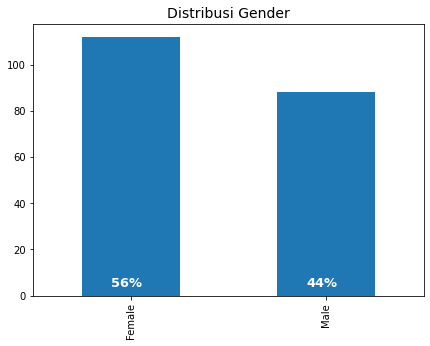

In [90]:
dstb = (df['Gender'].value_counts()/df['Gender'].count()*100).values
for i, v in enumerate(dstb): 
  df['Gender'].value_counts().plot.bar(figsize=(7, 5)).text(i-.10, v/dstb[i]+3, str(int(dstb[i]))+'%', fontsize=13, color='white', fontweight='bold');
  plt.title("Distribusi Gender", fontsize=14)

Terlihat bahwa $56\%$ dari data pelanggan $Mall$ merupakan pelanggan berjenis kelamin $Female$ (Perempuan) sedangkan  $44\%$ dari data pelanggan $Mall$ merupakan pelanggan berjenis kelamin $Male$ (Laki - Laki). Artinya sebanyak $112$ pelanggan merupakan pelanggan berjenis kelamin $Perempuan$ dari total $200$ pelanggan $Mall$.

**Distribusi Income, Spending Score serta umur.**

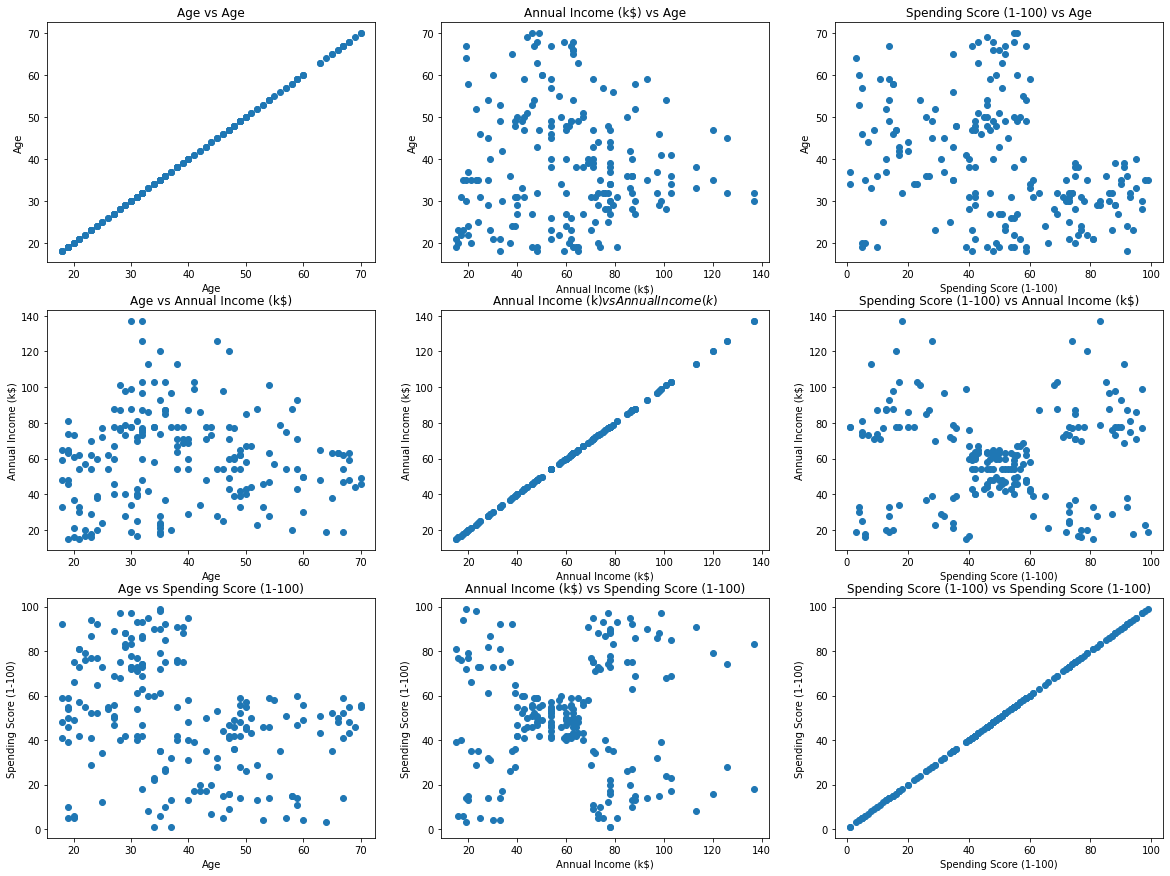

In [150]:
num_column = [col for col in df.columns if col != 'Gender' and  col != 'CustomerID']
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

counter = 0
for col in num_column:
  for col1 in num_column:
    x_axis = counter // 3
    y_axis = counter % 3
    ax[x_axis, y_axis].scatter(df[col1], df[col])
    ax[x_axis, y_axis].set_title(col1+" vs "+col)
    ax[x_axis, y_axis].set_xlabel(col1)
    ax[x_axis, y_axis].set_ylabel(col)
    counter += 1

plt.show()

Terlihat bahwa jumlah cluter yang mungkin terbentuk sudah bisa diidentifikasi berdasarkan visualisasi daiatas pada visual data $Annual Income$ VS $Spending Score$.

In [151]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---

## 3 - Pra-Proses

Pada tahap pra-proses umumnya ada 3 hal yang harus dilakukan diantaranya:


*   **Data Cleaning** : menghilangkan noise,missing, dan data yang tidak konsisten.
*   **Data Integration** : menggabungkan data dari sumber yang berbeda dan menyimpan data yang koheren
*   **Data Transformation** : meningkatkan akurasi dan efisiensi penggalian data (normalisasi)
*   **Data Reduction** : mereduksi ukuran data danmengeliminasi redudansi

Pada implentasi kali ini proses **Data Cleaning** tidak dilakukan karena telah diketahui di tahap explorasi data, dataset yang kita miliki tidak terdapat **missing value** dan proses **Data Integration** tidak perlu dilakukan.


---

### a. Data Reduction
Drop atribut **'Gender dan CustomerID'** dari dataset

In [239]:
# Drop atribut Gender dan CustomerID dari dataset
data = df.drop(['Gender', 'CustomerID', 'Age'], axis=1)
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


---

## 4 - Build Model

Pada model ini proses klasterisasi menggunakan algoritma K-means dengan $Elbow Method$ dan $Silhouette Score$ untuk analisa cluster yang cocok.

In [216]:
from sklearn.cluster import KMeans

**Fungsi Elbow Method**

In [217]:
def elbow_method(data, n_cluster):
  distortions = []
  for k in n_cluster:
    model = KMeans(n_clusters=k)
    model.fit(data)
    distortions.append(model.inertia_)

  plt.figure(figsize=(7, 5))
  plt.plot(n_cluster, distortions, 'r-')
  plt.xticks(n_cluster)
  plt.xlabel('Jumlah Kluster')
  plt.ylabel('Distortion (SSE)')
  plt.title('Elbow Method Menunjukkan Jumlah Cluster Yang Optimal')
  plt.show()

**Fungsi untuk mem-visualisasikan cluster yang terbentuk dengan scatter plot**

In [231]:
def show_graph_scatter(x=None, points=None, centroid=None, clusters=None):
    plt.rcParams['figure.figsize'] = [9, 5]
    colors = ['r', 'g', 'y', 'm', 'b']
    fig,ax = plt.subplots()

    for i in range(len(centroid)):
        points = np.array([x.values[j] for j in range(len(x)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
    ax.scatter(centroid[:, 0], centroid[:, 1], marker='o', s=50, cmap="red", linewidth=2)

    Class1= np.count_nonzero(clusters == 0)
    Class2= np.count_nonzero(clusters == 1)
    Class3= np.count_nonzero(clusters == 2)
    Class4= np.count_nonzero(clusters == 3)
    Class5= np.count_nonzero(clusters == 4)

    ax.set_xlabel(x.columns[0])
    ax.set_ylabel(x.columns[1])

    ax.legend(['Class 1 = '+str(Class1)+' Record',
               'Class 2 = '+str(Class3)+' Record',
               'Class 3 = '+str(Class3)+' Record',
               'Class 4 = '+str(Class4)+' Record',
               'Class 5 = '+str(Class5)+' Record'])
    
    ax.set_title("Visualisasi Cluster")

In [311]:
def show_dist_class(result_model, _class=1):
  data_class = result_model.loc[result_model['Class'] == _class]
  num_column = [col for col in data_class.columns if col != 'Class']

  fig, ax = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(20, 4))
  fig.suptitle("Distribusi Data Cluster-"+str(_class), fontsize="x-large")

  x_axis = 0
  for col in num_column:
    
    ax[x_axis].hist(data_class[col])
    ax[x_axis].set_title(col)
    
    x_axis += 1
  
  return data_class

---

### a. Cluster berdasarkan atribut AnnualIncome dan SpendingScore

Menganalisa jumlah cluster paling baik yang mungkin dibentuk dengan menggunakan teknik elbow method.

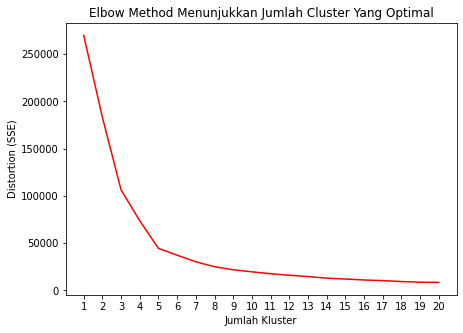

In [240]:
n_clusters = np.arange(1, 21)
elbow_method(data, n_clusters)

Terlihat bahwa jumlah cluster paling baik adalah sebanyak $5$ cluster.

In [241]:
model = KMeans(n_clusters=5)
model.fit(data)
model_labels = model.labels_
model_centroids = model.cluster_centers_

In [255]:
result_model = df.drop('CustomerID', axis=1)
result_model['Class'] = model_labels+1
result_model.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,Male,19,15,39,5
1,Male,21,15,81,3
2,Female,20,16,6,5
3,Female,23,16,77,3
4,Female,31,17,40,5


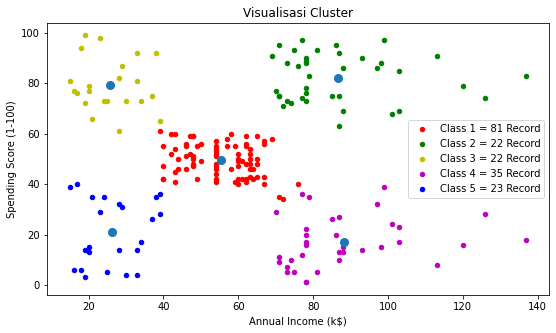

In [243]:
show_graph_scatter(x=data, centroid=model_centroids, clusters=model_labels)

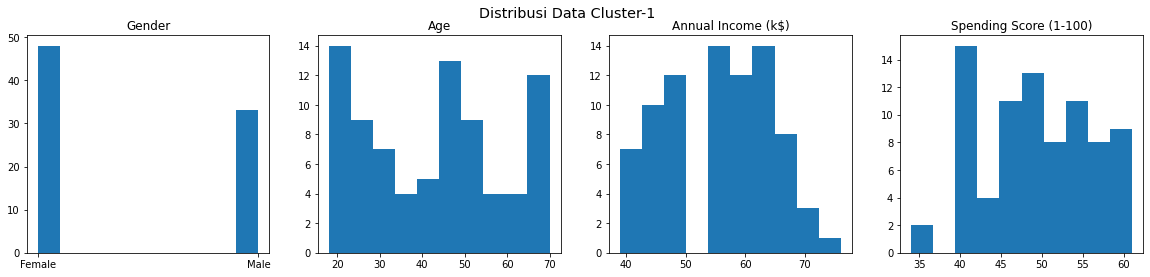

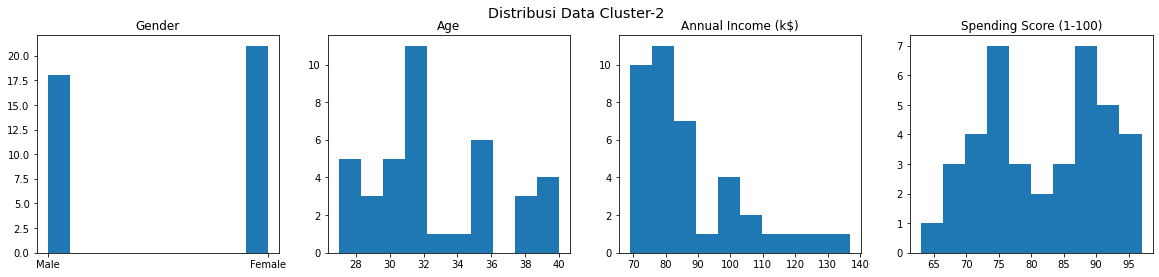

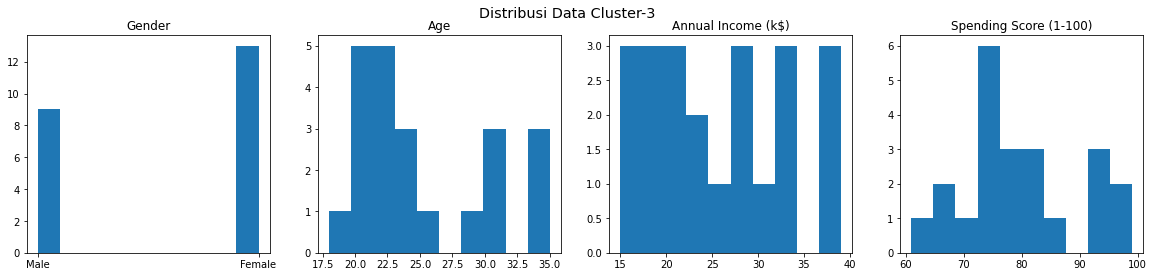

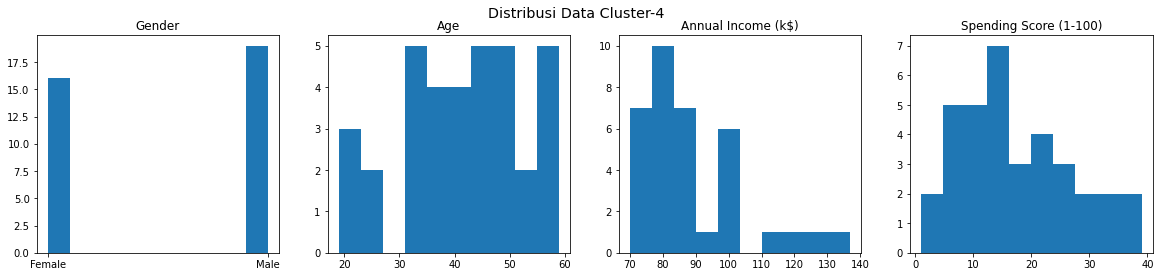

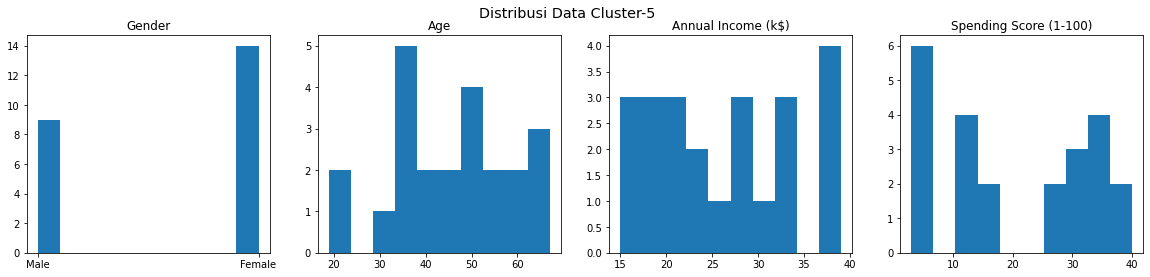

In [312]:
# Pilih cluter untuk ditampilkan
clusters = range(1, 6)
rec_of_data_class = []
for i, cls in enumerate(clusters):
  data_class = show_dist_class(result_model=result_model, _class=cls)
  rec_of_data_class.append(data_class)

In [303]:
for i, data_class in enumerate(rec_of_data_class):
  print("\n\nStatistik Data Untuk Cluster-{}: \n\n{}".format(i+1, data_class[['Age', 'Annual Income (k$)',	'Spending Score (1-100)']].describe()))



Statistik Data Untuk Cluster-1: 

             Age  Annual Income (k$)  Spending Score (1-100)
count  81.000000           81.000000               81.000000
mean   42.716049           55.296296               49.518519
std    16.447822            8.988109                6.530909
min    18.000000           39.000000               34.000000
25%    27.000000           48.000000               44.000000
50%    46.000000           54.000000               50.000000
75%    54.000000           62.000000               55.000000
max    70.000000           76.000000               61.000000


Statistik Data Untuk Cluster-2: 

             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000

---

# **Kesimpulan**

Berdasarkan hasil klasterisasi, didapatkan $5$ buah klaster dengan spesifikasi sebagai berikut:


*   $Cluster - 1$: Jumlah record sebanyak $81 - Record$ ditempati oleh pelanggang yang memiliki kriteria rata-rata $Income$ sebesar $\$55K$ dan $Spending Score$ sebesar $49$, dengan kata lain $Cluster - 1$ merupakan pelanggan-pelanggan yang masuk dalam kategori $'Sedang'$ dari segi $Income$ dan $Spending Score$. Dimana pada $Cluster - 1$ sebagian besar ditempati oleh pelanggan berjenis kelamin $Perempuan$ dengan rata-rata umur $43 -Tahun$ dan sekitar $75\%$ dari diantaranya berumur $54-Tahun$.

*   $Cluster - 2$: Jumlah record sebanyak $22 - Record$ ditempati oleh pelanggang yang memiliki kriteria rata-rata $Income$ sebesar $\$86K$ dan $Spending Score$ sebesar $82$, dengan kata lain $Cluster - 2$ merupakan pelanggan-pelanggan yang masuk dalam kategori $'Tinggi'$ dari segi $Income$ dan $Spending Score$. Dimana pada $Cluster - 2$ sebagian besar ditempati oleh pelanggan berjenis kelamin $Perempuan$ dengan rata-rata umur $33 -Tahun$ dan sekitar $75\%$ dari diantaranya berumur $35-Tahun$.

*   $Cluster - 3$: Jumlah record sebanyak $22 - Record$ ditempati oleh pelanggang yang memiliki kriteria rata-rata $Income$ sebesar $\$26K$ dan $Spending Score$ sebesar $79$, dengan kata lain $Cluster - 3$ merupakan pelanggan-pelanggan yang masuk dalam kategori $'Rendah'$ dari segi $Income$ tetapi $'Tinggi'$ dari segi $Spending Score$. Dimana pada $Cluster - 3$ sebagian besar ditempati oleh pelanggan berjenis kelamin $Perempuan$ dengan rata-rata umur $25 -Tahun$ dan sekitar $75\%$ dari diantaranya berumur $30-Tahun$.

*   $Cluster - 4$: Jumlah record sebanyak $35 - Record$ ditempati oleh pelanggang yang memiliki kriteria rata-rata $Income$ sebesar $\$88K$ dan $Spending Score$ sebesar $17$, dengan kata lain $Cluster - 4$ merupakan pelanggan-pelanggan yang masuk dalam kategori $'Tinggi'$ dari segi $Income$ tetapi $'Rendah'$ dari segi $Spending Score$. Dimana pada $Cluster - 4$ sebagian besar ditempati oleh pelanggan berjenis kelamin $Laki - Laki$ dengan rata-rata umur $41 -Tahun$ dan sekitar $75\%$ dari diantaranya berumur $47-Tahun$.

*   $Cluster - 5$: Jumlah record sebanyak $23 - Record$ ditempati oleh pelanggang yang memiliki kriteria rata-rata $Income$ sebesar $\$26K$ dan $Spending Score$ sebesar $21$, dengan kata lain $Cluster - 5$ merupakan pelanggan-pelanggan yang masuk dalam kategori $'Rendah'$ dari segi $Income$ dan $Spending Score$. Dimana pada $Cluster - 5$ sebagian besar ditempati oleh pelanggan berjenis kelamin $Perempuan$ dengan rata-rata umur $45 -Tahun$ dan sekitar $75\%$ dari diantaranya berumur $53-Tahun$.

---